In [1]:
# !pip install torch torchvision

In [2]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.optim  as opt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Data loading and preprocessing ##

In [3]:
data = pd.read_csv("data/heart_disease/processed.cleveland.data",header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'num'
]

data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [5]:
df_clean = data.loc[
          (data['ca'] != '?') & (data['thal'] != '?')]

In [6]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
len(df_clean)

297

In [8]:
X = df_clean.drop('num',axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [9]:
y = df_clean['num'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [10]:
X_data = pd.get_dummies(X,columns=[
    'cp',
    'restecg',
    'slope',
    'thal'
])

X_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [11]:
y[y>0] = 1
y.unique()

array([0, 1])

In [12]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

## Data Processing for Neural Network ##

In [13]:
X_data = X_data.values

In [14]:
scale  = StandardScaler()
X_data = scale.fit_transform(X_data)

In [15]:
X_data

array([[ 0.93618065,  0.69109474,  0.75038004, ..., -1.11044257,
         3.93700394, -0.79490133],
       [ 1.3789285 ,  0.69109474,  1.59626645, ...,  0.90054184,
        -0.25400025, -0.79490133],
       [ 1.3789285 ,  0.69109474, -0.65943064, ..., -1.11044257,
        -0.25400025,  1.25801776],
       ...,
       [ 1.48961547,  0.69109474,  0.69398761, ..., -1.11044257,
        -0.25400025,  1.25801776],
       [ 0.27205887,  0.69109474, -0.09550637, ..., -1.11044257,
        -0.25400025,  1.25801776],
       [ 0.27205887, -1.44697961, -0.09550637, ...,  0.90054184,
        -0.25400025, -0.79490133]])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size=0.3,random_state=42)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [18]:
len(X_train), len(X_val), len(X_test)

(165, 42, 90)

In [19]:
X_train_tensor = torch.tensor(X_train,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

In [20]:
X_val_tensor = torch.tensor(X_val,dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

In [21]:
X_test_tensor = torch.tensor(X_test,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [22]:
class heartDiseaseDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self,idx):
        return self.X[idx], self.y[idx]


train_data = heartDiseaseDataset(X_train_tensor,y_train_tensor)
val_data = heartDiseaseDataset(X_val_tensor,y_val_tensor)
test_data = heartDiseaseDataset(X_test_tensor,y_test_tensor)

In [23]:
train_loader = DataLoader(train_data,shuffle=True,batch_size=15)
val_loader = DataLoader(val_data,shuffle=False,batch_size=6)
test_loader = DataLoader(test_data,shuffle=False,batch_size=10)

In [24]:
for X,y in test_loader:
    print(f'Shape of X : {X.shape} || Shape of Y : {y.shape} {y.dtype}')

Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 22]) || Shape of Y : torch.Size([10]) torch.int64


## Model building and hyperparameter tuning ##

In [25]:
class HDNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(22, 25),
            nn.ReLU(),
            nn.Dropout(0.8),
            nn.Linear(25,25),
            nn.ReLU(),
            nn.Linear(25,30),
            nn.Sigmoid(),
            nn.Linear(30,2)
        )
    def forward(self,x):
        x = self.linear_stack(x)
        return x

net = HDNetwork()
print(net)

HDNetwork(
  (linear_stack): Sequential(
    (0): Linear(in_features=22, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.8, inplace=False)
    (3): Linear(in_features=25, out_features=25, bias=True)
    (4): ReLU()
    (5): Linear(in_features=25, out_features=30, bias=True)
    (6): Sigmoid()
    (7): Linear(in_features=30, out_features=2, bias=True)
  )
)


In [26]:
criterion = nn.CrossEntropyLoss()
optim = opt.Adam(params=net.parameters(),lr=0.005)

In [27]:
train_losses = []
val_losses = []
acc_list = []

In [28]:
def validate(val_data, model, loss_func):
    size = len(val_data.dataset)
    num_batches = len(val_data)

    model.eval()

    test_loss, acc = 0, 0 
    with torch.no_grad():
        for X, y in val_data:
            X = X.float()
            preds = model(X)

            test_loss += loss_func(preds, y).item()  # No need to re-convert y
            acc += (preds.argmax(1) == y).type(torch.float).sum().item()

        test_loss /= num_batches
        acc /= size

        val_losses.append(test_loss)
        acc_list.append(acc * 100)
        print(f"Test Error: \n Accuracy: {(100*acc):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [29]:
def train(train_data, val_data, model, loss_fun, optimizer):
    size = len(train_data.dataset)
    model.train()

    epoch_loss = 0 

    for batch, (X, y) in enumerate(train_data):
        X = X.float()
        preds = model(X)
        loss = loss_fun(preds, y)

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch%100 == 0:
            loss, curr = loss.item(), (batch+1)*len(X)
            print(f"loss: {loss:>7f}  [{curr:>5d}/{size:>5d}]")
            

    avg_train_loss = epoch_loss / len(train_data)
    train_losses.append(avg_train_loss)
    validate(val_data,model, loss_fun)

In [30]:
EPOCHS = 8
train_losses.clear()
val_losses.clear()
acc_list.clear()
for epoch in range(EPOCHS):
    print(f"Epoch{epoch+1}\n---------------------------------")
    train(train_loader,val_loader, net, criterion, optim)

print("Done!!")

Epoch1
---------------------------------
loss: 0.937646  [   15/  165]
Test Error: 
 Accuracy: 64.3%, Avg loss: 0.667295 

Epoch2
---------------------------------
loss: 0.688727  [   15/  165]
Test Error: 
 Accuracy: 73.8%, Avg loss: 0.662358 

Epoch3
---------------------------------
loss: 0.650268  [   15/  165]
Test Error: 
 Accuracy: 76.2%, Avg loss: 0.603003 

Epoch4
---------------------------------
loss: 0.630352  [   15/  165]
Test Error: 
 Accuracy: 78.6%, Avg loss: 0.501718 

Epoch5
---------------------------------
loss: 0.485919  [   15/  165]
Test Error: 
 Accuracy: 81.0%, Avg loss: 0.462320 

Epoch6
---------------------------------
loss: 0.501094  [   15/  165]
Test Error: 
 Accuracy: 81.0%, Avg loss: 0.449213 

Epoch7
---------------------------------
loss: 0.338411  [   15/  165]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.402703 

Epoch8
---------------------------------
loss: 0.636664  [   15/  165]
Test Error: 
 Accuracy: 81.0%, Avg loss: 0.443386 

Done!!


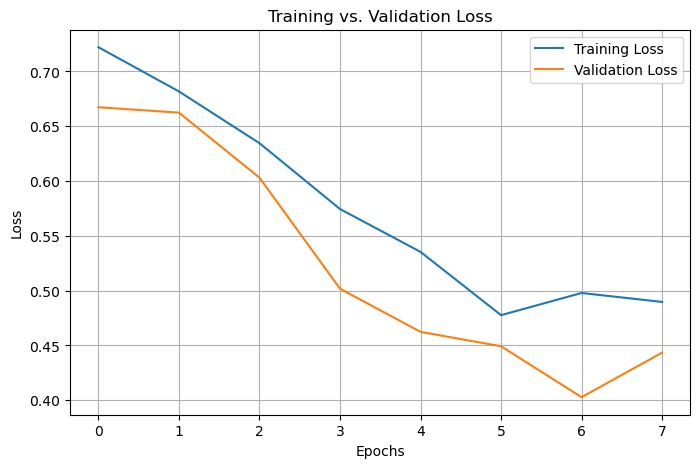

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid()
plt.show()

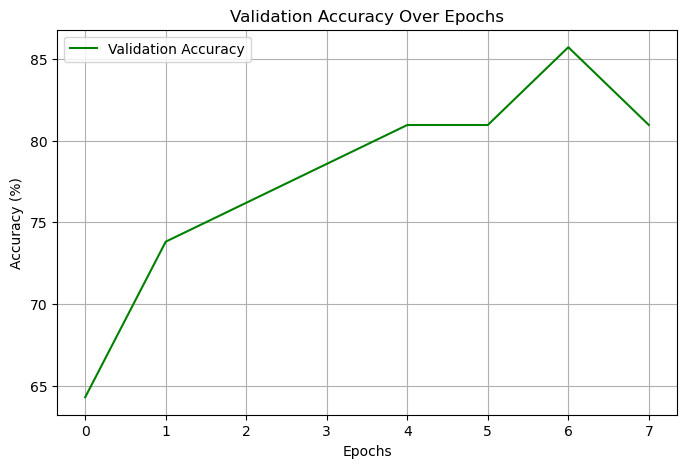

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(acc_list, label="Validation Accuracy", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

## Test the Model ##

In [52]:
class_names = ['No HD','HD']
X_test_tensor.data[45:51], y_test_tensor[45:51]

(tensor([[-1.8310,  0.6911, -0.6594, -0.3150, -0.4115,  1.4147,  1.4359,  2.3575,
          -0.7220,  3.4515, -0.4445, -0.6228, -0.9571,  1.0102, -0.1168, -0.9833,
          -0.9379,  1.0807, -0.2758, -1.1104, -0.2540,  1.2580],
         [-0.2814,  0.6911,  0.1301, -0.8929, -0.4115,  0.3668, -0.6964, -0.2195,
           0.3448, -0.2897,  2.2497, -0.6228, -0.9571,  1.0102, -0.1168, -0.9833,
           1.0662, -0.9253, -0.2758,  0.9005, -0.2540, -0.7949],
         [ 1.2682,  0.6911,  1.5963, -0.0260, -0.4115, -1.2924,  1.4359, -0.9067,
           2.4784, -0.2897,  2.2497, -0.6228, -0.9571,  1.0102, -0.1168, -0.9833,
          -0.9379,  1.0807, -0.2758, -1.1104,  3.9370, -0.7949],
         [-1.2776,  0.6911, -0.0955,  1.3032, -0.4115,  0.5414, -0.6964,  0.7254,
           0.3448, -0.2897, -0.4445,  1.6057, -0.9571,  1.0102, -0.1168, -0.9833,
           1.0662, -0.9253, -0.2758,  0.9005, -0.2540, -0.7949],
         [-1.0562, -1.4470, -0.0955, -0.2572, -0.4115,  1.1091, -0.6964, -0.3913,
  

In [53]:
new_preds = net(X_test_tensor.data[45:51])
new_preds = torch.argmax(new_preds, dim=-1)
new_preds = new_preds.numpy()
print(new_preds)

[1 0 1 0 0 0]


In [35]:
X_test_tensor.data[45:51]

tensor([[-1.8310,  0.6911, -0.6594, -0.3150, -0.4115,  1.4147,  1.4359,  2.3575,
         -0.7220,  3.4515, -0.4445, -0.6228, -0.9571,  1.0102, -0.1168, -0.9833,
         -0.9379,  1.0807, -0.2758, -1.1104, -0.2540,  1.2580],
        [-0.2814,  0.6911,  0.1301, -0.8929, -0.4115,  0.3668, -0.6964, -0.2195,
          0.3448, -0.2897,  2.2497, -0.6228, -0.9571,  1.0102, -0.1168, -0.9833,
          1.0662, -0.9253, -0.2758,  0.9005, -0.2540, -0.7949],
        [ 1.2682,  0.6911,  1.5963, -0.0260, -0.4115, -1.2924,  1.4359, -0.9067,
          2.4784, -0.2897,  2.2497, -0.6228, -0.9571,  1.0102, -0.1168, -0.9833,
         -0.9379,  1.0807, -0.2758, -1.1104,  3.9370, -0.7949],
        [-1.2776,  0.6911, -0.0955,  1.3032, -0.4115,  0.5414, -0.6964,  0.7254,
          0.3448, -0.2897, -0.4445,  1.6057, -0.9571,  1.0102, -0.1168, -0.9833,
          1.0662, -0.9253, -0.2758,  0.9005, -0.2540, -0.7949],
        [-1.0562, -1.4470, -0.0955, -0.2572, -0.4115,  1.1091, -0.6964, -0.3913,
         -0.722

In [43]:
y_test_tensor[45:51]

tensor([1, 0, 1, 0, 0, 0])

In [37]:
pred_labels = np.array(class_names)[new_preds]

In [48]:
true_labels = np.array(class_names)[y_test_tensor[45:51]]

In [49]:
accuracy = accuracy_score(y_test_tensor[45:51], new_preds)

print(f"Test Accuracy: {accuracy:.4f}")  

Test Accuracy: 1.0000


In [50]:
cfm = confusion_matrix(true_labels, pred_labels, labels=class_names)

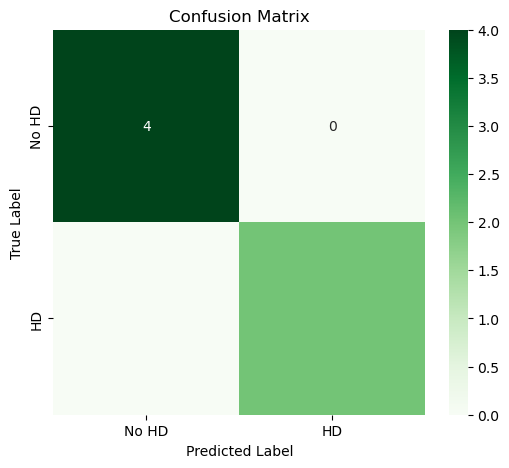

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(cfm, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()